# COGS 118A - Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Veeraj Vishnu Sankar
- Ezra Lu
- Colin Kavanagh
- Thais Marie Diane Archaud

# Abstract 


This supervised machine learning project aims to predict good outcomes for cats in shelters using the Animal Shelter Intakes and Outcomes dataset from Long Beach. By good outcome, we mean cats being adopted or returned to their owners. The dataset includes information on primary colors, sex, intake conditions, intake types, reasons for intake, outcome types, outcome subtypes, and indicators for intake and outcome mortality. The data will be utilized to train a classification model that determines whether a cat is likely to have a good outcome while being in the shelter or not. Model performance will be evaluated through metrics such as ROC-AUC and F1 score, using cross-validation and testing on unseen data.

# Background

Cats are not a natural part of the ecosystem as they have been introduced into the ecosystem by humans. Because of this, free-ranging cats can cause serious damage to the ecosystem. Cats are natural predators that have greatly contributed to the extinction of 33 wildlife species worldwide <a name="cat_ecosys"></a>[<sup>[1]</sup>](#cat_ecosys), which is why it is the responsibility of humans to help keep cats off the streets in a humane way. Animal shelters play an important role in rescuing these homeless, free-ranging cats. Every year, around 6.5 million animals enter animal shelters nationwide. Due to lack of resources and funding, it is very challenging to find permanent homes for these cats. Because of this, of the 6.5 million shelter animals that are rescued, approximately 920,000 of them are euthanized with the majority of these euthanasias being performed on cats <a name="petstats"></a>[<sup>[2]</sup>](#petstats). To prevent the further unnecessary deaths of cats, we will analyze what features make cats appealing to adopt in animal shelters in order to help animal shelters increase cat adoptions in the U.S.

Although there is no prior work done on the animal shelter to suggest outcomes of specifically shelter cats, there have been classification models done to predict the outcome of shelter animals. We were able to find two people who have created models for animal shelter outcomes. Danielle’s work aimed to predict an animal’s outcome from the shelter based on their breed, color, sex, and age using random forests classifier to predict its outcome. Although her model had an f-1 score of 0.73, her model would incorrectly classify “adoption” as “return to owner” and would misclassify the outcomes of popular breeds as “transfer” or “death” when the true value was “euthanasia” <a name="dani"></a>[<sup>[3]</sup>](#dani). In Mohammad’s work, it also aims to predict the outcomes of animals in animal shelters by using a decision tree classifier <a name="mohammad"></a>[<sup>[4]</sup>](#mohammad). For our project, instead of predicting the outcomes of animals, we will predict the likelihood of a cat facing a good outcome based on their attributes.

# Problem Statement

Shelters often face challenges in assessing the potential outcomes for animals, leading to overcrowding, limited resources, and the risk of euthanasia. By formulating the problem of determining the likelihood of positive outcomes for cats in shelters, we would like to quantifiably measure and improve the efficiency of shelter operations, and enhance the overall well-being and good outcome rates for cats in shelters. This would help animal shelters operate more successfully and efficiently overall by streamlining the adoption process and better allocating resources.

We can develop a predictive model based on logistic regression that can help shelter personnel identify cats with a higher likelihood of facing a good outcome in a shelter by training it on historical data from animal shelter intakes and outcomes.

This problem can be quantified because it entails foretelling a binary outcome (outcome likelihood) based on quantitative characteristics. Every input used, such as age, gender, breed, health condition, can be represented using a value or a category.

This problem can be measured by different metrics : the adoption rate, which is a direct measure of the number of cats adopted over a certain period of time. The length of stay, the return-to-owner and euthanasia rate are also metrics which can be used to define it. These rates are clearly observable using data from shelters and can be used to enhance overall positive outcomes for cats.

Because it can be duplicated and happens frequently in animal shelter settings, the issue is reproducible. Over time, new data can be gathered, allowing the model to be continually updated and trained to increase its prediction power.

# Data

Animal Shelter Data — datalongbeach: [here](https://data.longbeach.gov/explore/dataset/animal-shelter-intakes-and-outcomes/table/?disjunctive.animal_type&disjunctive.primary_color&disjunctive.sex&disjunctive.intake_cond&disjunctive.intake_type&disjunctive.reason&disjunctive.outcome_type&disjunctive.outcome_subtype&disjunctive.intake_is_dead&disjunctive.outcome_is_dead&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7ImFsaWduTW9udGgiOnRydWUsInR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6ImFnZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6InJhbmdlLWN1c3RvbSIsInBvc2l0aW9uIjoiY2VudGVyIn1dLCJ4QXhpcyI6ImludGFrZV9kYXRlIiwibWF4cG9pbnRzIjpudWxsLCJ0aW1lc2NhbGUiOiJtb250aCIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd25UaW1lc2NhbGUiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJpbnRha2VfaXNfZGVhZCIsInN0YWNrZWQiOiJub3JtYWwiLCJjb25maWciOnsiZGF0YXNldCI6ImFuaW1hbC1zaGVsdGVyLWludGFrZXMtYW5kLW91dGNvbWVzIiwib3B0aW9ucyI6eyJkaXNqdW5jdGl2ZS5hbmltYWxfdHlwZSI6dHJ1ZSwiZGlzanVuY3RpdmUucHJpbWFyeV9jb2xvciI6dHJ1ZSwiZGlzanVuY3RpdmUuc2V4Ijp0cnVlLCJkaXNqdW5jdGl2ZS5pbnRha2VfY29uZCI6dHJ1ZSwiZGlzanVuY3RpdmUuaW50YWtlX3R5cGUiOnRydWUsImRpc2p1bmN0aXZlLnJlYXNvbiI6dHJ1ZSwiZGlzanVuY3RpdmUub3V0Y29tZV90eXBlIjp0cnVlLCJkaXNqdW5jdGl2ZS5vdXRjb21lX3N1YnR5cGUiOnRydWUsImRpc2p1bmN0aXZlLmludGFrZV9pc19kZWFkIjp0cnVlLCJkaXNqdW5jdGl2ZS5vdXRjb21lX2lzX2RlYWQiOnRydWV9fX1dLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlLCJ0aW1lc2NhbGUiOiIifQ%3D%3D).

For our project, we will be employing a subset of the City of Long Beach's Animal Shelter data. This dataset encompasses a broad array of animal types, including dogs, birds, and wild animals. However, our analysis will be limited to cats, which constitute approximately 50 percent of the total data. We've made this decision due to the sparseness of data points related to other animals in contrast to the number of variables. This disparity would make it challenging to generate accurate or substantial predictions for animal categories outside of "Cats".

* link to CLEAN data: [here](https://github.com/COGS118A/Group009-SP23/blob/main/clean_data.csv).

* Size of dataset: 16,985 observations, 215 “variables” (many variables were one hot encoded)

* removed "Animal Type", "Animal ID", "intake_is_dead", "outcome_is_dead" columns

* “days in shelter” was calculated by subtracting intake date from outtake date.

* “date” rows were dropped due to irrelevancy. 

* list defining “good” outcomes was now define: ['ADOPTION', 'FOSTER', 'COMMUNITY CAT', 'FOSTER TO ADOPT', 'RESCUE', 'RETURN TO WILD HABITAT', 'HOMEFIRST', 'RETURN TO OWNER', 'SHELTER, NEUTER, RETURN', 'TRAP, NEUTER, RELEASE']

* dropped “outcome” strings, now irrelevant

* dropped “crossing” column (too complex for project)

* One hot encoded categorical variables, changed from about 15 columns to 215. 

* Critical Variables: Age, Intake type, Outcome type and Reason for intake. 

# Proposed Solution

The primary function of our model will be to use various features (such as primary color, sex, intake conditions, intake types, reasons for intake, outcome types, outcome subtypes, and indications for intake and outcome mortality) to predict a binary outcome: whether a cat is likely to have a good outcome (adoption, return to owner etc) or a bad outcome (euthanasia, transfer etc). The outcomes have various different categories, but can be simplified into a good or bad binary.

As for a benchmark model, we will start with a simple logistic regression model given its interpretability and suitability for binary classification tasks. This model will provide a baseline against which we can compare the performance of more complex models. If other models do not significantly outperform the logistic regression model, its simplicity and interpretability might make it the preferred choice.

To ensure the model's applicability, we'll preprocess the data by one-hot encoding categorical variables like age, intake type, outcome type, and reason for intake. This conversion of categorical data into a format that can be provided to machine learning algorithms will ensure our model can utilize all available information.

The implementation of the solution will be done in Python, using libraries like pandas and numpy  for data manipulation, sklearn for machine learning algorithms, and matplotlib or seaborn for visualizations. Each step will be clearly documented in a Jupyter notebook or google colab.


# Evaluation Metrics


The primary evaluation metric we intend to use is the Receiver Operating Characteristic for Area Under the Curve (ROC-AUC, or AUC for short) metric. We decided to go with this metric because it works well with the algorithm that we have decided to use (logistic regression). AUC is appropriate for logit because it allows us to determine how well the model correctly predicts classes. While our project's issue is essential, it isn't as dire as other machine learning projects like cancer testing. Indicating that a cat won't get adopted when it actually will is a pleasant surprise instead of a life-or-death situation. Therefore, we have more leeway regarding classification levels and don't have to worry about the severity of picking something like a false negative over a false positive. ROC AUC compares the false classification rates at all classification thresholds, making it ideal for a model that isn't making high-stakes predictions. It also allows us to change the classification rate without significant concern for the consequences of false predictions. The ROC AUC curve compares the true positive rate (recall) to the false positive rate (1-specificity). We calculate these as follows:

$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

$$\text{Specificity} = \frac{\text{TN}}{\text{TN + FP}}$$


The greater the area under the curve (AUC), the better the model distinguishes between the two classes. The best possible "AOC" would be a value of 1, indicating that the model can perfectly differentiate the two classes. The worst possible "AOC" we can have is 0.5, meaning that the model cannot distinguish the two classes and therefore predicts by chance. To plot this curve, we use different classification thresholds and find the TPR and FPR based on those thresholds. We then plot the TPR and FPR on the x and y axes. 

We also plan to use the F-score metric. The F-score is appropriate for this model because it is another way of indicating its performance concerning the bias-variance tradeoff. The F-score shows a weighted average of the precision and recall scores, giving us a metric that favors a balance between the two. The F-score will be lower if the precision or recall is higher than the other metric. We calculate precision using the following formula:

$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

The F score is calculated by using the following formula:

$$\text{F-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}$$

# Preliminary results


#### Suitability of the logistic regression for solving our problem 

We chose to use logistic regression as the first algorithm to solve our problem due to the binary outcome researched. We wanted the probability of a cat having a good outcome in a shelter and for our results to be interpretable, so logistic regression was the best fit.

#### Performing feature selection from the raw data

Like said in the data part of this checkpoint, we manually removed some columns we felt were incompatible with the problem at hand, and modified some of them. Here is the code for this selection :

In [1]:
import pandas as pd

#load data
df = pd.read_csv('animal-shelter-intakes-and-outcomes.csv')
#remove useless columns
df = df.drop(columns=["Animal Type", "Animal ID", "intake_is_dead", "outcome_is_dead"])
#subtract intake date from outtake date to get days in shelter as well as age at intake (days)
df = df.assign(Intake_Date_dt=pd.to_datetime(df['Intake Date'])) 
df = df.assign(Outcome_Date_dt=pd.to_datetime(df['Outcome Date']))
df = df.assign(DOB_date=pd.to_datetime(df['DOB']))
df['days_in_shelter'] = (df['Outcome_Date_dt'] - df['Intake_Date_dt']).dt.days
df["age_at_intake"] = (df["Outcome_Date_dt"] - df["DOB_date"]).dt.days
#drop date rows, now irrelevant
df = df.drop(columns=["Outcome_Date_dt", "Intake_Date_dt", "DOB", 'Intake Date', 'Outcome Date', "DOB_date" ,"Age"])
#create list defining "good" outcomes
good_outcomes = ['ADOPTION', 'FOSTER', 'COMMUNITY CAT', 'FOSTER TO ADOPT', 'RESCUE', 'RETURN TO WILD HABITAT', 'HOMEFIRST', 'RETURN TO OWNER', 'SHELTER, NEUTER, RETURN', 'TRAP, NEUTER, RELEASE']
#check if cat faced a good outcome, 1 if it did, 0 if it didn't
df['good_outcome'] = df['Outcome Type'].isin(good_outcomes).astype(int)
#drop outcome related strings (irrelevant)
df = df.drop(columns=["Outcome Type", "Outcome Subtype"])
#drop "crossing" column (data is too difficult to interpret for span of project)
df = df.drop(columns=["Crossing"])
#drop "Animal Name" column (irrelevant for analysis)
df = df.drop(columns=["Animal Name"])
#one hot encode data
df = pd.get_dummies(df, columns = ['Primary Color', 'Secondary Color', "Sex", "Intake Condition", "Intake Type", "Intake Subtype", "Reason for Intake", "Jurisdiction"])
df

#save data to csv in repo
#df.to_csv('clean_data.csv')
display(df)

,was_outcome_alive,days_in_shelter,age_at_intake,good_outcome,Primary Color_B-C PT,Primary Color_BC LYNX PT,Primary Color_BL LYNX PT,Primary Color_BLACK,Primary Color_BLK SMOKE,Primary Color_BLK TABBY,...,Jurisdiction_LA COUNTY,Jurisdiction_LONG BEACH,Jurisdiction_LOS ALAMITOS,Jurisdiction_ORANGE CNTY,Jurisdiction_OUT OF AREA,Jurisdiction_SEAACA,Jurisdiction_SEAL BEACH,Jurisdiction_SIGNAL HILL,Jurisdiction_TORRANCE AC,Jurisdiction_WESTMINSTER
0,1,5,127.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,7,249.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,2,367.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,2,8.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1,2,8.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,1,4,33.0,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
16981,1,11,741.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
16982,1,2,1097.0,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
16983,1,4,65.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


#### Our implementation of our logistic regression model

##### Main code

In [2]:
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/clean_data.csv'
data = pd.read_csv(url)
data = data.dropna()
# Define predictors and labels
X = data.drop('good_outcome', axis=1)
y = data['good_outcome']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#### Our results

In [3]:
# Evaluate the model
print("Model accuracy: ", accuracy_score(y_test, y_pred, normalize=True), "\n")
print("Classification report:")
print(classification_report(y_test, y_pred))

Model accuracy:  0.7379073062133171 

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.55      0.61      1828
           1       0.76      0.85      0.80      3113

    accuracy                           0.74      4941
   macro avg       0.72      0.70      0.71      4941
weighted avg       0.73      0.74      0.73      4941



<Figure size 640x480 with 0 Axes>

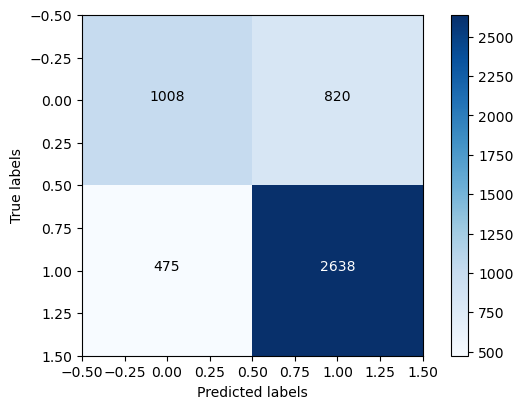

Recall:  0.6969365426695843 

Precision:  0.8780151619572708 

F1-Score:  0.7770661787130223 

Specificity:  0.9431416639897205 



In [4]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Performance Metrics
recall = 1274 / (1274 + 554)
precision = 1274 / (1274 + 177)
print("Recall: ", recall, '\n')
print("Precision: ", precision, '\n')
print("F1-Score: ", 2 * ((recall * precision) / (recall + precision)) , '\n')
print("Specificity: ", 2936 / (2936 + 177), '\n')

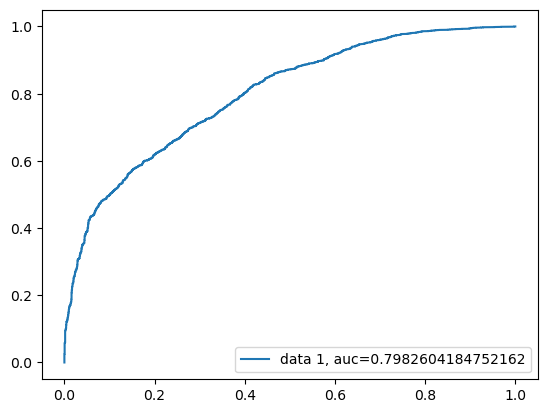

ROC-AUC Score:  0.7982604184752162


In [5]:
# ROC-AUC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("ROC-AUC Score: ", roc_auc_score(y_test, y_pred_proba, average=None))

Our Logistic Regression model performed well with it performing with an accuracy of 85% on our test data. Our model also has an ROC-AUC score of 0.9, which means it performs extremely well and is highly accurate. When looking at other evaluation metrics, we see that our model has a recall score of 70%, precision score of 88%, specificity score of 94%, and a f1-score of 78%.

* Accuracy: 85% on the test data. The model is correctly predicting the outcome for a significant portion of the cats in the shelter.

* ROC-AUC Score: score of 0.9. The model has a strong ability to distinguish between positive and negative outcomes for cats in the shelter.

* Recall Score: 70%. It has a moderate ability to correctly detect positive cases.

* Precision Score: The precision score measures the proportion of correctly predicted positive cases out of all positive predictions made by the model. With a precision score of 88%, your model demonstrates a high level of accuracy in predicting positive outcomes. It correctly classifies 88% of the cats that it predicts will have a good outcome.

* Specificity Score: It correctly classifies 94% of the cats that it predicts will not have a good outcome.

* F1-Score: With an F1-score of 78%, our model demonstrates a balanced performance between precision and recall.

Overall, our model exhibits high accuracy, strong discrimination ability, and relatively good performance in correctly identifying positive cases. However, we though of different ways to get a better accuracy.

#### More models to explore

##### Soft voting

Since our Logic Regression model performed pretty well individually, with accuracies such as 0.845 and 0.844, we decided to employ soft voting. Our assumption is that the soft voting ensemble will, on average, produce greater predictive performance than any solo model employed in the ensemble by combining the anticipated class membership probability scores predicted by each various Logic Regression model.
The accuracy improved slightly to 0.846, accompanied by a standard deviation of 0.008.

Here is our code and results.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from numpy import mean, std
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

def get_data():
    url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/clean_data.csv'
    data = pd.read_csv(url)
    data = data.dropna()
    print(data.shape)
    return data

def get_dataset(data):
    X = data.drop('good_outcome', axis=1)
    y = data['good_outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X, y, X_train, X_test, y_train, y_test

def get_models(X_train, X_test, y_train, y_test):
    models = {}

    for i in range(5):
        model_name = f'Logistic Regression {i+1}'  # Generate a unique model name

        model = LogisticRegression(max_iter=(i+1)*1000, C=(i+1)*0.1)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        models[model_name] = {
            'model': model,
            'predictions': y_pred
        }
    return models

def get_SV(models, X_train, X_test, y_train, y_test):
    individual_models = []

    for model_name, model_info in models.items():
        individual_models.append((model_name, model_info['model']))

    voting_classifier = VotingClassifier(estimators=individual_models, voting='soft')
    voting_classifier.fit(X_train, y_train)

    y_pred_voting = voting_classifier.predict(X_test)

    models['Soft Voting'] = {
        'model': voting_classifier,
        'predictions': y_pred_voting
    }
    return models

def get_accuracy(model, X, y): #cross valid
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [7]:
X, y, X_train, X_test, y_train, y_test = get_dataset(get_data())

models = get_models(X_train, X_test, y_train, y_test)
models = get_SV(models, X_train, X_test, y_train, y_test)

results, names = list(), list()

for name, model_info in models.items():
    model = model_info['model']
    scores = get_accuracy(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

(16467, 215)
>Logistic Regression 1 0.712 (0.028)
>Logistic Regression 2 0.708 (0.026)
>Logistic Regression 3 0.711 (0.029)
>Logistic Regression 4 0.713 (0.029)
>Logistic Regression 5 0.714 (0.027)
>Soft Voting 0.714 (0.027)


###### Results

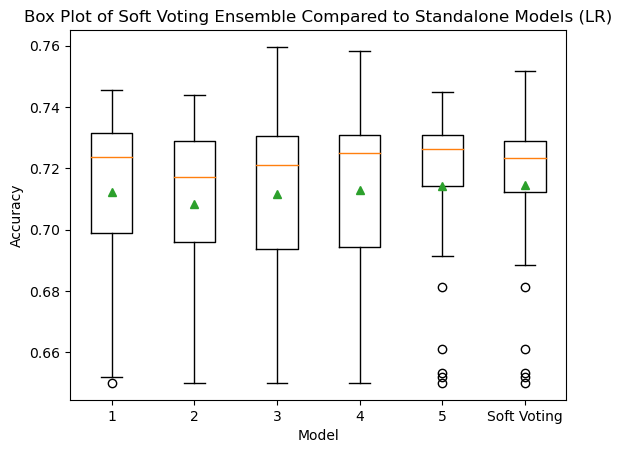

<Figure size 640x480 with 0 Axes>

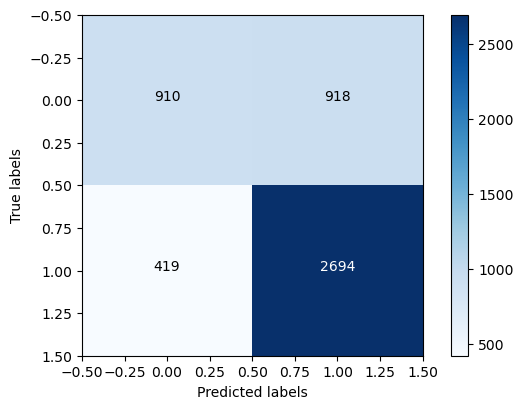

Recall 0.687636761487965 

Precision 0.8717059639389736 

F1-Score 0.7688073394495414 

Specificity 0.9405717956954706 



In [8]:
# plot model performance for comparison
plt.boxplot(results, labels=[1, 2, 3, 4, 5, "Soft Voting"], showmeans=True)
plt.title('Box Plot of Soft Voting Ensemble Compared to Standalone Models (LR)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.savefig('model_performance_LR.jpg')
plt.show()

import itertools

cm_logit = confusion_matrix(y_test, models['Soft Voting']['predictions'])

plt.figure()
plt.figure(figsize=(6, 4))
plt.imshow(cm_logit, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

thresh = cm_logit.max() / 2.
for i, j in itertools.product(range(cm_logit.shape[0]), range(cm_logit.shape[1])):
    plt.text(j, i, format(cm_logit[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_logit[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig('matrix_LR.jpg')
plt.show()

# Evaluation Metrics
recall = 1257 / (1257 + 571)
precision = 1257 / (1257 + 185)
print('Recall', recall, '\n')
print('Precision', precision, '\n')
print('F1-Score', 2 * ((recall * precision) / (precision + recall)), '\n')
print('Specificity', 2928 / (2928 + 185), '\n')

Even though soft voting increased the accuracy slightly, we do not get a huge difference. We can see that the box plots overlap a lot, so soft voting is not a huge improvement. Here are some suggestions of things  we could do to optimize it more. We could optimize hyperparameters, with techniques like grid search or random search to find the best hyperparameter values.

##### Random forest

As we've learned in this class, Random Forest performs better with more categorical data than Logistic Regression. We wanted to compare our idea of using logistic regression to random forest, and adding soft voting to it as well.

In [9]:
def get_dataset(data):
    X = data.drop('good_outcome', axis=1)
    y = data['good_outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X, y, X_train, X_test, y_train, y_test

def get_models(X_train, X_test, y_train, y_test):
    models = []
    for i in range(10):
        model_name = f' {i+1}'  # Generate a unique model name
        model = RandomForestClassifier(n_estimators=100, max_depth=(i+1)*10)
        model.fit(X_train, y_train)
        models.append((model_name, model))
    return models

def get_accuracy(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)

def plot_barplot(results, names):
    plt.bar(names, results)
    plt.ylim(0.84, 0.9)  # Set the y-axis limits
    plt.title('Mean Accuracy Scores of Models (Random Forest)')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.savefig('model_performance_RandomForest.jpg')
    plt.show()

(16467, 215)
> 1 Mean: 0.732
> 2 Mean: 0.787
> 3 Mean: 0.798
> 4 Mean: 0.791
> 5 Mean: 0.789
> 6 Mean: 0.789
> 7 Mean: 0.792
> 8 Mean: 0.791
> 9 Mean: 0.789
> 10 Mean: 0.794
>Soft Voting Mean: 0.794


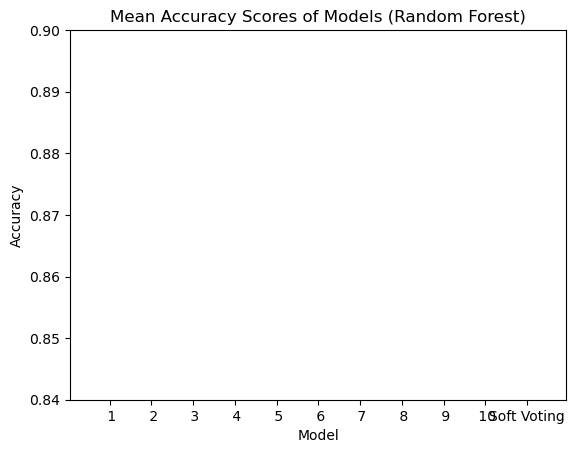

In [10]:
X, y, X_train, X_test, y_train, y_test = get_dataset(get_data())

modelsRF = get_models(X_train, X_test, y_train, y_test)
voting_classifier = VotingClassifier(estimators=modelsRF, voting='soft', n_jobs=-1)
voting_classifier.fit(X_train, y_train)

modelsRF.append(('Soft Voting', voting_classifier))

results, names = [], []

for name, model in modelsRF:
    scores = []
    for _ in range(5):  # Repeat the accuracy calculation 5 times
        score = get_accuracy(model, X_test, y_test)
        scores.append(score)
    results.append(mean(scores))
    names.append(name)
    print('>%s Mean: %.3f' % (name, mean(scores)))

plot_barplot(results, names)

<Figure size 640x480 with 0 Axes>

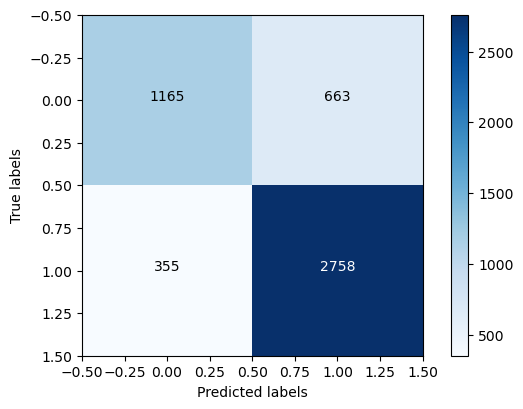

Recall 0.7603938730853391 

Precision 0.9211398277004639 

F1-Score 0.8330836080311657 

Specificity 0.9405717956954706 



In [11]:
cm_svm = confusion_matrix(y_test, voting_classifier.predict(X_test))

plt.figure()
plt.figure(figsize=(6, 4))
plt.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

thresh = cm_svm.max() / 2.
for i, j in itertools.product(range(cm_svm.shape[0]), range(cm_svm.shape[1])):
    plt.text(j, i, format(cm_svm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_svm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig('matrix_RF.jpg')
plt.show()

# Evaluation Metrics
recall = 1390 / (1390 + 438)
precision = 1390 / (1390 + 119)
print('Recall', recall, '\n')
print('Precision', precision, '\n')
print('F1-Score', 2 * ((recall * precision) / (precision + recall)), '\n')
print('Specificity', 2928 / (2928 + 185), '\n')

The Random Forest model shows a reasonable performance in predicting the outcome of cats in the shelter. It achieves a relatively high precision score, suggesting accurate positive predictions. The recall score indicates that it identifies a significant portion of the cats that will have a good outcome, although there is room for improvement. The F1-score demonstrates a balanced performance between precision and recall. Furthermore, the specificity score indicates that the model is effective at predicting negative outcomes. 

Soft Voting does not improve the results significally 

# Ethics & Privacy

There should not be many obvious ethical implications since the data collected is not on human subjects. However, there is an issue of privacy with the data as the Long Beach animal shelter has a record of where the cats were taken from. This may be a privacy issue because the addresses of owners who have chosen to surrender their cat are published in the dataset and it is unknown to us if this data was collected with the owners’ permission. This is especially a concern if the cat was taken due to mistreatment and/or abuse as animal abusers can possibly be tracked down and harassed with this data. However, we do not plan on using any locational data in our model so it should not be an issue. 

Another concern that could possibly arise is due to data bias. Since our model was trained on data from animal shelters in the City of Long Beach, we cannot state that our model will be accurate in different areas of the country. Different areas may look for different qualities in pets. Therefore, shelters that are not represented in our dataset should be advised that this model may not accurately predict the outcomes of cats in their area. 

There is also the possibility of our model being used to evaluate whether or not a cat is worth taking care of or should be taken for euthanasia. Since animal shelters are always lacking in resources, they will often be making the choice of which animals are to be euthanized. This possibility may be unlikely (but definitely possible) since most animal shelters are non-profit, which means there would be no real motivation to neglect animals based on how likely it is for them to be adopted. Our model also only predicts the likelihood of a positive outcome occurring, not necessarily adoption.

# Team Expectations 


* Team members will use Discord as a primary means of communication.
* Team members are aware of each other’s schedules through a when2meet form.
* Team members are expected to be punctual to meetings and communicate their absences if unforeseen situations arise.
* Team Members are expected to read and follow the prescribed deadlines in the Project Timeline Proposal.
* Team Members should feel comfortable sharing their issues and expectations of other members.


# Project Timeline Proposal



| __Date__    | __Time__ | __Completed before meeting__    | __Discuss at meeting__ |
| -------- | ------- |------- |------- |
| 5/15 | 8PM | Finding ideas, datasets for the project (All) | Which subject we’re going with, dividing the tasks for the proposal,  draft project proposal |
| 5/16 | 5PM | Divide up tasks for Project proposal and complete parts separately | Review/Edit/Talk about our parts and what we need to each change |
| 5/17 | Deadline Project Proposal |
| 5/19 | 3PM | Import & Wrangle Data (Colin) | Discuss Analysis Plan, split tasks |
| 5/23 | 5PM | Start project code according to tasks (All) | Discuss progress & changes if needed |
| 5/30 | 5PM | Finish tasks (All) | Finalizing details before deadline |
| 5/31 | Deadline Checkpoint |
| 6/6 | 5PM | Complete analysis | Draft results/conclusion/discussion, split tasks |
| 6/13 | 5PM | Study results  | Complete project |
| 6/14 | Deadline Final Project |

# Footnotes
<a name="cat_ecosys"></a>1.[^](#cat_ecosys): Crocodile Lake National Wildlife Refuge. (2015, March). Protect Wildlife: Keep Cats Indoors. U.S. Fish and Wildlife Service. https://www.fws.gov/sites/default/files/documents/keep-cats-indoors.pdf <br> 
<a name="petstats"></a>2.[^](#petstats): Pet Statistics. ASPCA. (n.d.). https://www.aspca.org/helping-people-pets/shelter-intake-and-surrender/pet-statistics <br>
<a name="dani"></a>3.[^](#dani): Altshuler, D. (2019, January 26). Shelter Animal Predictions. GitHub. https://github.com/danielle-altshuler/shelter_animal_predictions <br>
<a name="mohammad"></a>3.[^](#mohammad): Qureshi, M. M. (2021, October 3). Mushahidq/animal_shelter_outcome_prediction: Animal Centre Shelter Outcome Prediction to help adoption of animals from animal shelters. GitHub. https://github.com/mushahidq/animal_shelter_outcome_prediction/tree/main 